module 'kv_template' has no attribute 'dataset_info'
Loaded dataset with 1427 elements
loading model: /root/autodl-fs/gpt-j-6b


INFO:accelerate.utils.modeling:We will use 90% of the memory on device 0 for storing the model, and 10% for the buffer to avoid OOM. You can set `max_memory` in to a higher value to use more memory (at your own risk).


/root/autodl-fs/gpt-j-6b model loaded
Using noise_level 0.094207763671875 to match model times 3.0


Causal tracing...: 100%|██████████| 3/3 [01:38<00:00, 32.94s/it]

Restoring state


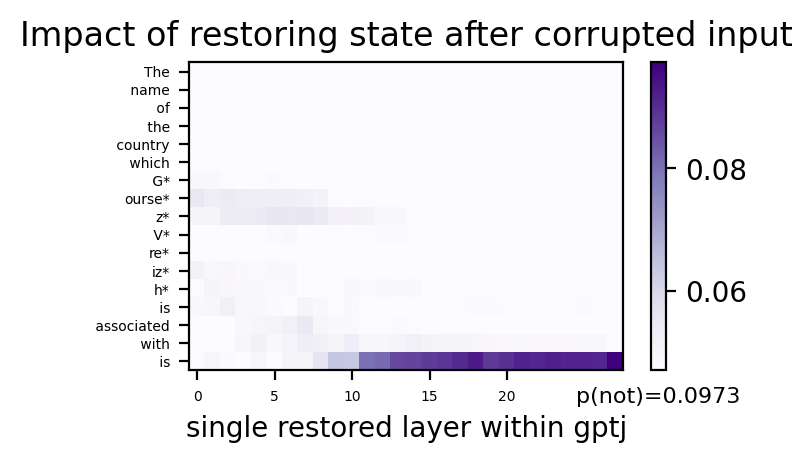

Restoring Attn


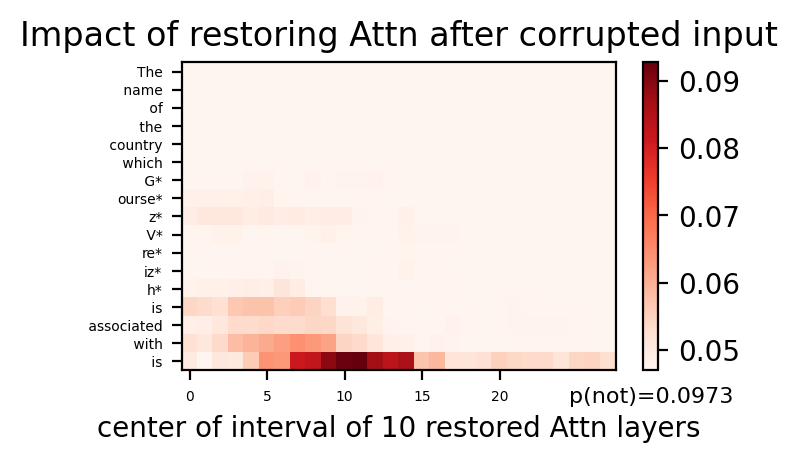

Restoring MLP


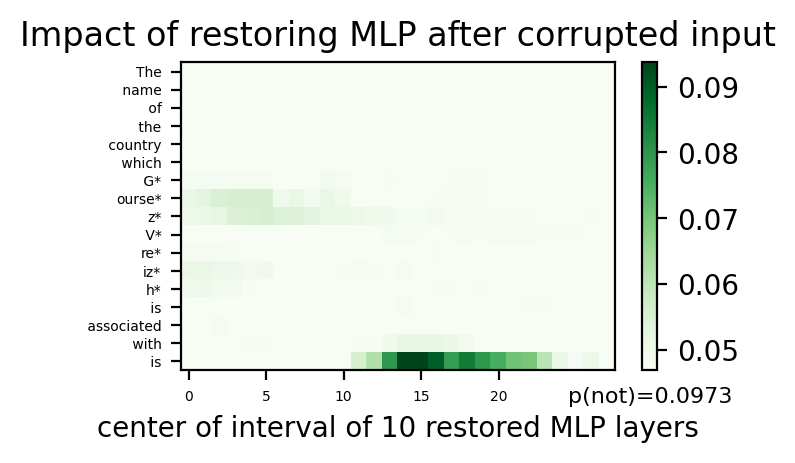

{'origin_data': {'model_output': ' not', 'prob': 0.09733803570270538, 'tokens': ['The', ' name', ' of', ' the', ' country', ' which', ' G', 'ourse', 'z', ' V', 're', 'iz', 'h', ' is', ' associated', ' with', ' is'], 'subject range': (6, 13), 'Restoring state score': [[0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536], [0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.04691263660788536, 0.0469126366078

In [1]:
from diagnose import diagnose
from dataset_process import knowns, ZsRE, counterfact
from models import llama, gptj, gpt2, qwen, chatglm2, internlm, baichuan
from methods import causal_trace

# dataset = knowns.KnownsDataset(loc=knowns.default_loc)
# sample = knowns.get_processed_kvs(dataset[0], kn.requires_input_keys)
# dataset = ZsRE.ZsREDataset(loc=ZsRE.default_loc)
# sample = ZsRE.get_processed_kvs(dataset[0], kn.requires_input_keys)
dataset = counterfact.CounterfactDataset(loc=counterfact.default_loc)
sample = counterfact.get_processed_kvs(dataset[0], causal_trace.requires_input_keys)
result = diagnose.diagnosing(sample=sample, model_name_or_path=gptj, method=causal_trace.name)

import os
from IPython.display import display, Image
for img_info in result["image"]:
    image_path = img_info["image_path"]
    image_name = img_info["image_name"]
    if os.path.exists(image_path):
        print(f"{image_name}")
        display(Image(filename=image_path))

print(result)
